# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [196]:
import numpy as np

#We import autoreload modules when code is run. Otherwise, to make sure our notebook has the recent changes from the python file. 
%load_ext autoreload
%autoreload 2

#We import our python file, where we have set up our model.
import inauguralproject

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Definition of the parameters

In [197]:
alpha = 1/3
beta = 2/3
omega_A = np.array([0.8, 0.3])
omega_B = 1 - omega_A
p2 = 1
N=75

Defintion of the utility functions for both agents 

In [198]:
def uA(x1, x2):
    return x1**alpha * x2**(1-alpha)

def uB(x1, x2):
    return x1**beta * x2**(1-beta)

Defintion of the demand functions for both agents 

In [199]:
def demand_A(p1, omega_A=omega_A):
    x1_star = alpha * (omega_A[0]*p1 + omega_A[1]*p2) / p1
    x2_star = (1-alpha) * (omega_A[0]*p1 + omega_A[1]*p2) / p2
    return np.array([x1_star, x2_star])

def demand_B(p1, omega_B=omega_B):
    x1_star = beta * (omega_B[0]*p1 + omega_B[1]*p2) / p1
    x2_star = (1-beta) * (omega_B[0]*p1 + omega_B[1]*p2) / p2
    return np.array([x1_star, x2_star])

# Question 1

In question 1, we will illustrate the set of Pareto optimal allocations for two consumers, A and B, within an Edgeworth box framework, which depicts the distribution of two goods in an exchange economy.

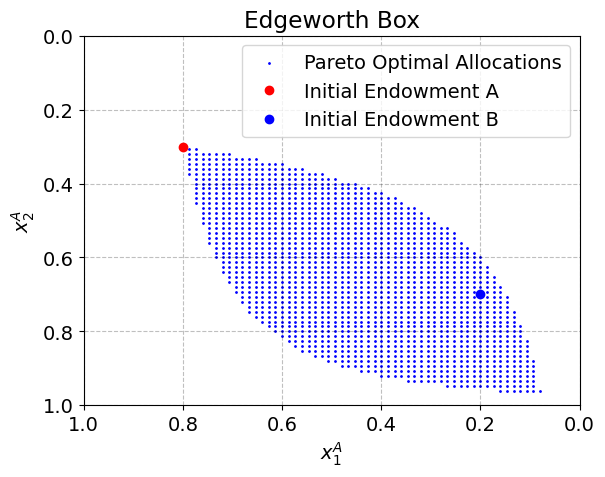

In [200]:
#We have aldready defined our parameters and our utility functions

#We now calculate the initial utilities for both agents
initial_U_A = uA(omega_A[0], omega_A[1])
initial_U_B = uB(omega_B[0], omega_B[1])

#We initialize lists to hold Pareto optimal allocations
pareto_x1_A = []
pareto_x2_A = []
pareto_x1_B = []
pareto_x2_B = []

#Then we loop over all possible combinations of good allocations to A 
for x1_A in np.linspace(0, 1, N+1):
    for x2_A in np.linspace(0, 1, N+1):
        # And calculates the remaining goods for B
        x1_B = 1 - x1_A
        x2_B = 1 - x2_A

        #We check if this allocation is Pareto optimal
        if u_A(x1_A, x2_A) >= initial_U_A and u_B(x1_B, x2_B) >= initial_U_B:
            pareto_x1_A.append(x1_A)
            pareto_x2_A.append(x2_A)
            pareto_x1_B.append(x1_B)
            pareto_x2_B.append(x2_B)

#We will now plot the Edgeworth Box 
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

#For simplicity we continue plotting individual points but ensure they are comprehensive
ax.scatter(pareto_x1_A, pareto_x2_A, c='blue', label='Pareto Optimal Allocations', s=1)

#We highlight initial endowments
ax.plot(omega_A[0], omega_A[1], 'ro', label="Initial Endowment A")
ax.plot(omega_B[0], omega_B[1], 'bo', label="Initial Endowment B")

#We set labels and titles
ax.set_xlabel('$x_1^A$')
ax.set_ylabel('$x_2^A$')
ax.set_title('Edgeworth Box')

#We invert axes to match the convention
ax.invert_yaxis()
ax.invert_xaxis()

#We add a legend
ax.legend()

#And lastly we show the plot
plt.show()


# Question 2

In question 2, we will calculate the error in the market clearing condition for a range of prices p1 within a given set P1. 


In [201]:
#We will assume the same definition of demand_A and demand_B 

# We will ensure N is defined as an integer
N = 75  

#We initialize the set of prices P1 
P1 = np.linspace(0.5, 2.5, int((2.5 - 0.5) / (2 / N)) + 1)

#We now initialize lists to store the market clearing errors for both goods
errors_good1 = []
errors_good2 = []

#We make a loop over each price in P1
for p1 in P1:
    # And calculate demands for both consumers at the given price p1
    demand_for_A = demand_A(p1)
    demand_for_B = demand_B(p1)

#We compute the market clearing error for good 1 and for good 2
epsilon1 = abs(demand_for_A[0] + demand_for_B[0] - 1)
epsilon2 = abs(demand_for_A[1] + demand_for_B[1] - 1)

#We store the errors
errors_good1.append(epsilon1)
errors_good2.append(epsilon2)

#Lastly we print the errors
print(errors_good1)
print(errors_good2)

[0.3733333333333334]
[0.9333333333333333]


# Question 3

In question 3 we will find the market clearing price.

In [203]:
#We assume demand_A and demand_B functions as well as the initial endowments are defined here
def market_clearing_error(p1, omega_A, omega_B):
    #We calculate demands for both consumers at the given price p1
    demand_A_ = demand_A(p1, omega_A)
    demand_B_ = demand_B(p1, omega_B)

#Then we calculate the market clearing errors for both goods
    error_good1 = demand_A_[0] + demand_B_[0] - (omega_A[0] + omega_B[0])
    error_good2 = demand_A_[1] + demand_B_[1] - (omega_A[1] + omega_B[1])

#We now make sure that the errors are floats
    error_good1 = float(error_good1)
    error_good2 = float(error_good2)

#We return errors as a list of floats
    return [error_good1, error_good2]

#We set an initial guess for the price of good 1
initial_guess_p1 = [1.0]

#And then we solve for the market clearing price
market_clearing_price = fsolve(market_clearing_error, initial_guess_p1, args=(omega_A, omega_B))

#We print the market clearing price for good 1
print(f"The market clearing price for good 1 is approximately: {market_clearing_price[0]}")


/var/folders/17/75_mlt4x0gz0w87tygvp5qf80000gn/T/ipykernel_74949/3677810817.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  error_good1 = float(error_good1)
/var/folders/17/75_mlt4x0gz0w87tygvp5qf80000gn/T/ipykernel_74949/3677810817.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  error_good2 = float(error_good2)


ValueError: The array returned by a function changed size between calls

ADD CONCISE CONLUSION.

# Question 4a

# Question 4b

# Question 5a

# Question 5b

# Question 6a

# Question 6b

# Question 7

# Question 8